In [1]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import csv
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

def insert_data(file,create_statement,insert_statement,val):
    dr ={}
    conn = create_connection('Boston_crime.db', True)
    cur = conn.cursor()
    with conn:
        create_table(conn,create_statement)
    with open(file,'r') as file:
        shootings_dict = csv.DictReader(file)
    cur.executemany(insert_statement,val)
    conn.commit()
    conn.close()

def Crime_Inc_Rep(file):
    conn = create_connection('Boston_crime.db', True)
    cur = conn.cursor()
    with open(file,'r') as file:
        my_dict = csv.DictReader(file)
        val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
            ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
            ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
            ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
            ,i['Location']) for i in my_dict]

    cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)
    conn.commit()
    conn.close()

conn = create_connection('Boston_crime.db', True)
cur = conn.cursor()

In [2]:
#Shootings Table Data
dr ={}

sql_statement = '''CREATE table Shootings (Incident_Num TEXT, Shooting_Date TEXT, 
                  District TEXT, Shooting_Type_V2 TEXT, Victim_Gender TEXT, 
                  Victim_Race TEXT,Victim_Ethnicity_NIBRS TEXT,Multi_Victim TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('Shootings.csv','r') as file:
    shootings_dict = csv.DictReader(file)
    val = [(i['Incident_Num'],i['Shooting_Date'],i['District'],i['Shooting_Type_V2'],i['Victim_Gender'],i['Victim_Race'],i['Victim_Ethnicity_NIBRS'],i['Multi_Victim']) for i in shootings_dict]

cur.executemany("INSERT INTO SHOOTINGS VALUES (?,?,?,?,?,?,?,?)",val)
conn.commit()
    

In [3]:
#Shots Fired Table Data
dr ={}
sql_statement = '''CREATE table Shots_Fired(Incident_Num TEXT, Incident_Date TEXT, 
                  District TEXT, Ballistics_Evidence TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('Shots_Fired.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['Incident_Num'],i['Incident_Date'],i['District'],i['Ballistics_Evidence']) for i in my_dict]

cur.executemany("INSERT INTO Shots_Fired VALUES (?,?,?,?)",val)
conn.commit()


In [4]:
#Crime Incident Report Table Data
dr ={}

sql_statement = '''CREATE table Crime_Incident_Reports(Incident_Num TEXT, Offense_Code TEXT, 
       Offense_Code_Group TEXT, Offense_Description TEXT, District TEXT,
       Reporting_Area TEXT, Shooting TEXT, Occurred_On_Date TEXT, 
       Year TEXT, Month TEXT,Day_Of_Week TEXT, Hour TEXT, UCR_Part,
       Street TEXT, Lat TEXT,Long TEXT, Location TEXT);'''
with conn:
    create_table(conn,sql_statement)

# Crime_Inc_Rep('crime-incident-reports-2015.csv')
# Crime_Inc_Rep('crime-incident-reports-2016.csv')
  
with open('crime-incident-reports-2015.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('crime-incident-reports-2016.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('crime-incident-reports-2017.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('crime-incident-reports-2018.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('Crime_Incident_Reports_2019.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)


with open('Crime_Incident_Reports_2020.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)


with open('Crime_Incident_Reports_2021.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)


conn.commit()



In [5]:
#BEST Table data

dr ={}
sql_statement = '''CREATE table Best(Month TEXT, Incidents TEXT, 
                  Proactive_Engagements TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('Boston Emergency Services Team Best.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['Month'],i['incidents'],i['proactive_engagements']) for i in my_dict]

cur.executemany("INSERT INTO Best VALUES (?,?,?)",val)
conn.commit()


In [6]:
# in_custody_death Table data
dr ={}
sql_statement = '''CREATE table in_custody_deaths(incident_number TEXT, incident_date TEXT, 
                  incident_location TEXT, incident_district TEXT,during_arrest TEXT, during_transport TEXT,
                  while_in_holding_cell TEXT, other TEXT,
                  prisoner_age TEXT, prisoner_race TEXT,
                  prisoner_sex_mf TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('in-custody-deaths.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['incident_number'],i['incident_date'],i['incident_location']
          ,i['incident_district'],i['during_arrest'],i['during_transport'],i['while_in_holding_cell']
          ,i['other'],i['prisoner_age'],i['prisoner_race'],i['prisoner_sex_mf']) for i in my_dict]

cur.executemany("INSERT INTO in_custody_deaths VALUES (?,?,?,?,?,?,?,?,?,?,?)",val)
conn.commit()



In [7]:
# bpd_firearm_recovery_counts table data
dr ={}
sql_statement = '''CREATE table bpd_firearm_recovery_counts(collection_date TEXT, crime_guns_recovered TEXT, 
                  guns_recovered_safeguard TEXT, buyback_gunsrecovered);'''
with conn:
    create_table(conn,sql_statement)
with open('BPD Firearm Recovery Counts.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['CollectionDate'],i['CrimeGunsRecovered'],i['GunsRecoveredSafeguard']
          ,i['BuybackGunsRecovered']) for i in my_dict]

cur.executemany("INSERT INTO bpd_firearm_recovery_counts VALUES (?,?,?,?)",val)
conn.commit()


In [8]:
# homicide_clearance_rate table data
dr ={}
sql_statement = '''CREATE table homicide_clearance_rate(year TEXT, homicides TEXT, 
                  same_year_clear TEXT, previous_year_clear TEXT, 
                  same_year_not_cleared TEXT, total_clear TEXT,
                  percent_cleared_same_year TEXT, percent_cleared_previous_year TEXT,
                  percent_not_cleared_same_year TEXT, clearance_rate TEXT,
                  percent_of_cleared_same_year TEXT, percent_of_cleared_previous_year TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('homicide-clearance-rate.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['Year'],i['Homicides'],i['Same Year Clear']
          ,i['Previous Year Clear'],i['Same Year Not Cleared'],i['Total Clear']
          ,i['Percent Cleared Same Year'],i['Percent Cleared Previous Year']
          ,i['Percent Not Cleared Same Year'],i['Clearance Rate'],i['Percent of Cleared Same Year']
          ,i['Percent of Cleared Previous Year']) for i in my_dict]

cur.executemany("INSERT INTO homicide_clearance_rate VALUES (?,?,?,?,?,?,?,?,?,?,?,?)",val)
conn.commit()


In [9]:
#historical_data_crime_incident_reports table data
dr ={}
sql_statement = '''CREATE table historical_data_crime_incident_reports(compnos TEXT, nature_code TEXT, 
                  incident_type_desc TEXT, main_crime_code TEXT, 
                  rept_district TEXT, reporting_area TEXT,
                  from_date TEXT, weapon_type TEXT,
                  shooting TEXT, domestic TEXT,
                  shift TEXT, year TEXT,month TEXT, day_week TEXT,
                  ucr_part TEXT, x TEXT, y TEXT,
                  street_name TEXT, xstreet_name TEXT,location TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('crime-incident-reports-july-2012-august-2015-source-legacy-system.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['COMPNOS'],i['NatureCode'],i['INCIDENT_TYPE_DESCRIPTION']
          ,i['MAIN_CRIMECODE'],i['REPTDISTRICT'],i['REPORTINGAREA']
          ,i['FROMDATE'],i['WEAPONTYPE']
          ,i['Shooting'],i['DOMESTIC'],i['SHIFT']
          ,i['Year'],i['Month'],i['DAY_WEEK'],i['UCRPART']
          ,i['X'],i['Y'],i['STREETNAME']
          ,i['XSTREETNAME'],i['Location']) for i in my_dict]

cur.executemany("INSERT INTO historical_data_crime_incident_reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)
conn.commit()

In [10]:
#rmsoffensecodes Table data
dr ={}
sql_statement = '''CREATE table rmsoffensecodes(code TEXT, name TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('rmsoffensecodes.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['CODE'],i['NAME']) for i in my_dict]

cur.executemany("INSERT INTO rmsoffensecodes VALUES (?,?)",val)
conn.commit()

In [ ]:
"""""""""""""""""""DATA PREPARATION BEGINS"""""""""""""""""""""""""""""""""""""""""

In [136]:
sql_statement = "drop table dp_crime_table_score_card;"
conn.execute(sql_statement)
conn.commit()

In [137]:

sql_statement = """
    create table dp_crime_table_score_card as 
    
    with distinct_vals as 
    (
    select 
    
        distinct 
        cast(Offense_Code as int) as Offense_Code, 
        case 
            when 
                lower(Offense_Description) like '%kill%' or
                lower(Offense_Description) like '%murder%' or
                lower(Offense_Description) like '%prostitution%' or
                lower(Offense_Description) like '%burglary%' or
                lower(Offense_Description) like '%bomb%' or
                lower(Offense_Description) like '%kidnapping%' or
                lower(Offense_Description) like '%manslaughter%' or
                lower(Offense_Description) like '%homicide%' or
                lower(Offense_Description) like '%robbery%' or
                lower(Offense_Description) like '%weapon%'
            then 1000
            when 
                lower(Offense_Description) like '%stole%' or
                lower(Offense_Description) like '%warrant%' or
                lower(Offense_Description) like '%prisoner%' or
                lower(Offense_Description) like '%assault%' or
                lower(Offense_Description) like '%larceny%' or
                lower(Offense_Description) like '%trafficking%' or
                lower(Offense_Description) like '%firearm%' or
                lower(Offense_Description) like '%drug%' or
                lower(Offense_Description) like '%theft%'
            then 500
            else 100
        end as Crime_Score,
        Offense_Description
    
    from 
    
        Crime_Incident_Reports 
    )
    select 
        ROW_NUMBER() OVER (ORDER BY Offense_Code) as score_card_id,
        Offense_Code,
        Crime_Score,
        Offense_Description
    from 
        distinct_vals
    ;
    """

conn.execute(sql_statement)
conn.commit()

In [77]:

sql_statement = """
    create table dp_district as 
    with distinct_vals as 
    (
        select distinct 

            district

        from 

            Crime_Incident_Reports 

        WHERE  

            ltrim(rtrim(district)) <> ''
            and lower(district) <> 'external'
    ) 
    
    select 
    
        ROW_NUMBER() OVER (ORDER BY district) as district_id,
        district
        
    from 
    
        distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

In [ ]:
"""""""""""""""""""DATA PREPARATION ENDS"""""""""""""""""""""""""""""""""""""""""

In [ ]:
"""""""""""""""""""DATA ANALYSIS BEGINS"""""""""""""""""""""""""""""""""""""""""

,district,Crime_Score_Index
0,D4,331
1,A1,325
2,C6,304
3,E13,293
4,B2,291
5,C11,285
6,A7,284
7,A15,277
8,D14,275
9,B3,273


<AxesSubplot:xlabel='district'>

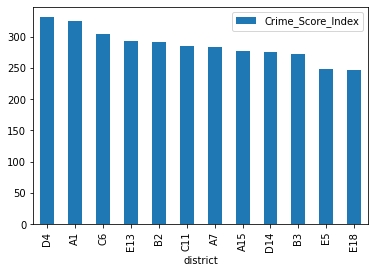

In [138]:
# Safety Scoring for each district from the year 2015 - Present

sql_statement = """
    select
        
        Crime_Incident_Reports.district as district
        , sum(dp_crime_table_score_card.Crime_Score)/count(Crime_Incident_Reports.district) as Crime_Score_Index
        --, count(Crime_Incident_Reports.Incident_Num)
    
    from 
    
        Crime_Incident_Reports
        left join dp_crime_table_score_card on dp_crime_table_score_card.Offense_Code = Crime_Incident_Reports.Offense_Code
    
    group by
    
        1
    
    having
    
        ltrim(rtrim(Crime_Incident_Reports.district)) <> '' 
        and 
        lower(Crime_Incident_Reports.district) <> 'external'
    
    order by 
        
        Crime_Score_Index desc
    """
df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot(x = 'district', y = 'Crime_Score_Index', kind = 'bar')

In [ ]:
"""""""""""""""""""DATA ANALYSIS ENDS"""""""""""""""""""""""""""""""""""""""""

,Year,shooting,other_crimes,total_crimes,percentage_of_shootings,percentage_of_other_crimes
0,2015,251,53346,53597,0.47,99.53
1,2016,345,99085,99430,0.35,99.65
2,2017,457,100881,101338,0.45,99.55
3,2018,402,98486,98888,0.41,99.59
4,2019,617,66992,67609,0.91,99.09
5,2020,1122,69772,70894,1.58,98.42
6,2021,860,64155,65015,1.32,98.68


,Year,percentage_of_shootings,percentage_of_other_crimes
0,2015,0.47,99.53
1,2016,0.35,99.65
2,2017,0.45,99.55
3,2018,0.41,99.59
4,2019,0.91,99.09
5,2020,1.58,98.42
6,2021,1.32,98.68


<AxesSubplot:title={'center':'Shootings to Other Crime Ratio'}, xlabel='Year'>

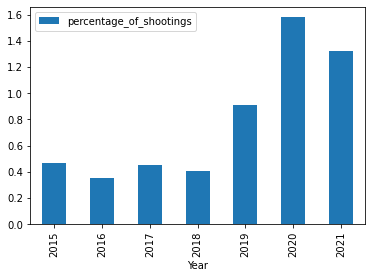

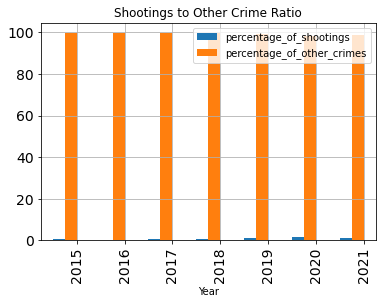

In [209]:
sql_statement = """
    with shooting_details as
    (
        select
           case 
               when Shooting in ('Y',1) then 1
               else 0
            end as Shooting_ind,
            Year

        from 

            Crime_Incident_Reports

    )
    select 

        year,
        sum(shooting_ind) as shooting,
        sum(case when Shooting_ind = 0 then 1 end) as other_crimes,
        count(year) as total_crimes,
        round(cast(sum(shooting_ind) as float)/cast(count(year) as float)*100,2) as percentage_of_shootings,
        round(cast(sum(case when Shooting_ind = 0 then 1 end) as float)/cast(count(year) as float)*100,2) as percentage_of_other_crimes 

    from shooting_details
    group by 1
    
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)
df.plot(x = 'Year', y = 'percentage_of_shootings', kind = 'bar')
df1 = df[['Year','percentage_of_shootings', 'percentage_of_other_crimes']]
display(df1)
df1.plot.bar(x = 'Year', title = 'Shootings to Other Crime Ratio', grid = True, fontsize = 14, position = 1)


In [97]:

sql_statement = """
    select *
    from 
    
        Crime_Incident_Reports 
        
    WHERE  
    
        ltrim(rtrim(district)) <> ''
        and lower(district) <> 'external'
    
    ;
    """
df = pd.read_sql_query(sql_statement, conn)
display(df)

,Incident_Num,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,UCR_Part,Street,Lat,Long,Location
0,I192068249,02647,Other,THREATS TO DO BODILY HARM,B2,280,,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.33011862,-71.08425106,"(42.33011862, -71.08425106)"
1,I192061894,01106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.30060543,-71.06126785,"(42.30060543, -71.06126785)"
2,I192038828,01107,Fraud,FRAUD - IMPERSONATION,A1,172,,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.33428841,-71.07239518,"(42.33428841, -71.07239518)"
3,I192008877,01107,Fraud,FRAUD - IMPERSONATION,E18,525,,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.2370095,-71.12956606,"(42.23700950, -71.12956606)"
4,I182090828,01102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.34243222,-71.07225766,"(42.34243222, -71.07225766)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552999,121000816,3304,,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,,BRADFIELD AVENUE,0,0,"(0, 0)"
553000,120221042,3006,,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,,WASHINGTON ST,42.2839024364831,-71.130862626435,"(42.2839024364831, -71.130862626435)"
553001,10637224,3125,,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270,0,2021-01-26 18:54:00,2021,1,Tuesday,18,,NORTHAMPTON ST,42.3339512483938,-71.0753893882269,"(42.3339512483938, -71.0753893882269)"
553002,023844463,3115,,INVESTIGATE PERSON,C6,,0,2021-10-16 01:16:00,2021,10,Saturday,1,,G ST & E 8TH ST\nBOSTON MA 02127\nUNITED STATES,42.3313200390092,-71.0440799616656,"(42.3313200390092, -71.0440799616656)"


In [45]:

sql_statement = "select * from shots_fired;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,Incident_Num,Incident_Date,District,Ballistics_Evidence
0,I152000093-00,2015-01-01 04:17:00,C11,f
1,I152000042-00,2015-01-01 00:05:00,A15,f
2,I152000514-00,2015-01-02 15:51:00,B3,t
3,I152000965-00,2015-01-04 15:30:00,B2,t
4,I152000872-00,2015-01-04 00:13:00,B2,f
...,...,...,...,...
6621,212083621,2021-11-14 23:56:00,B3,f
6622,212084172,2021-11-17 03:03:00,B2,f
6623,212084367,2021-11-17 18:46:00,B2,t
6624,212084717,2021-11-18 23:06:00,C11,t


,Offense_Code,Crime_Score,Offense_Description
0,99999,low,Evidence Tracker Incidents
1,3831,low,M/V - LEAVING SCENE - PROPERTY DAMAGE
2,3830,low,M/V - LEAVING SCENE - PERSONAL INJURY
3,3821,low,M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY
4,3820,low,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
...,...,...,...
306,123,high,MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE
307,121,high,MANSLAUGHTER - VEHICLE - NEGLIGENCE
308,112,high,KILLING OF FELON BY POLICE
309,111,high,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"


In [48]:

sql_statement = "select * from Best;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,Month,Incidents,Proactive_Engagements
0,January 2020,27,19
1,February 2020,24,7
2,March 2020,36,49
3,April 2020,53,75
4,May 2020,59,75
5,June 2020,41,54
6,July 2020,34,59
7,August 2020,59,44
8,September 2020,47,40
9,October 2020,61,52


In [49]:

sql_statement = "select * from in_custody_deaths;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,incident_number,incident_date,incident_location,incident_district,during_arrest,during_transport,while_in_holding_cell,other,prisoner_age,prisoner_race,prisoner_sex_mf
0,162038132,5/16/2016,101 West Broadway,C-6,No,No,Yes,N/A,41,B/N,F
1,182071986,9/7/2018,40 New Sudbury Street,A-1,No,No,Yes,N/A,45,W/N,M
2,192039859,5/28/2019,650 Harrison Ave,D-4,No,No,Yes,N/A,39,W/H,M
3,192054041,7/14/2019,650 Harrison Ave,D-4,No,Yes,No,N/A,49,B/N,M
4,192054058,7/14/2019,650 Harrison Ave,D-4,No,No,Yes,N/A,23,W/N,M
5,202007074,1/27/2020,9 Paris St,A-7,No,No,Yes,N/A,50,W/N,M


In [50]:

sql_statement = "select * from bpd_firearm_recovery_counts;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,collection_date,crime_guns_recovered,guns_recovered_safeguard,buyback_gunsrecovered
0,0014-10-03,2,0,0
1,2014-08-19,292,134,369
2,2014-08-20,2,3,1
3,2014-08-21,2,0,4
4,2014-08-22,0,0,2
...,...,...,...,...
1947,2021-11-24,0,0,0
1948,2021-11-25,0,0,0
1949,2021-11-26,0,0,0
1950,2021-11-27,0,0,0


In [51]:

sql_statement = "select * from homicide_clearance_rate;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,year,homicides,same_year_clear,previous_year_clear,same_year_not_cleared,total_clear,percent_cleared_same_year,percent_cleared_previous_year,percent_not_cleared_same_year,clearance_rate,percent_of_cleared_same_year,percent_of_cleared_previous_year
0,2020,57,19,1,38,20,0.3333,0.0175,0.6667,0.3509,0.95,0.05
1,2019,37,17,7,20,24,0.4595,0.1892,0.5405,0.6486,0.7083,0.2917
2,2018,56,32,6,24,38,0.5714,0.1071,0.4286,0.6786,0.8421,0.1579
3,2017,57,26,9,31,35,0.4561,0.1579,0.5439,0.614,0.7429,0.2571
4,2016,49,19,11,30,30,0.3878,0.2245,0.6122,0.6122,0.6333,0.3667
5,2015,40,16,13,24,29,0.4,0.325,0.6,0.725,0.5517,0.4483


In [52]:

sql_statement = "select * from historical_data_crime_incident_reports;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,compnos,nature_code,incident_type_desc,main_crime_code,rept_district,reporting_area,from_date,weapon_type,shooting,domestic,shift,year,month,day_week,ucr_part,x,y,street_name,xstreet_name,location
0,120420285,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,07/08/2012 06:00:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,,"(42.34638135, -71.10379454)"
1,120419202,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,07/08/2012 06:03:00 AM,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,,"(42.31684135, -71.07458456)"
2,120419213,ARMROB,ROBBERY,03xx,D4,625,07/08/2012 06:26:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,765118.8605,2950217.536,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)"
3,120419223,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,07/08/2012 06:56:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,,"(42.3164411, -71.06582908)"
4,120419236,ARMROB,ROBBERY,03xx,E18,496,07/08/2012 07:15:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,759042.7315,2923832.681,COLLINS ST,,"(42.27051636, -71.11989955)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268051,,MVA,Motor Vehicle Accident Response,MVAcc,B3,565,08/10/2015 02:38:00 AM,None,No,No,,2015,8,Monday,Part Three,,,HARVARD ST,WALK HILL ST,"(0.0, 0.0)"
268052,,ARREST,Police Service Incidents,Service,C11,348,08/10/2015 04:46:00 AM,None,No,No,,2015,8,Monday,Part Three,,,DORCHESTER AVE,LYON ST,"(0.0, 0.0)"
268053,,MVA,Motor Vehicle Accident Response,MVAcc,B2,313,08/10/2015 04:48:00 AM,None,No,No,,2015,8,Monday,Part Three,,,DECKARD ST,HUMBOLDT AVE,"(0.0, 0.0)"
268054,,CD19,Investigate Person,InvPer,D4,275,08/10/2015 05:01:00 AM,None,No,No,,2015,8,Monday,Part Three,,,HAMMOND ST,NULL,"(0.0, 0.0)"


In [44]:

sql_statement = "SELECT * FROM sqlite_master WHERE type='table';"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,type,name,tbl_name,rootpage,sql
0,table,Shootings,Shootings,2,"CREATE TABLE Shootings (Incident_Num TEXT, Sho..."
1,table,Shots_Fired,Shots_Fired,43,"CREATE TABLE Shots_Fired(Incident_Num TEXT, In..."
2,table,Crime_Incident_Reports,Crime_Incident_Reports,113,CREATE TABLE Crime_Incident_Reports(Incident_N...
3,table,Best,Best,24932,"CREATE TABLE Best(Month TEXT, Incidents TEXT, ..."
4,table,in_custody_deaths,in_custody_deaths,24933,CREATE TABLE in_custody_deaths(incident_number...
5,table,bpd_firearm_recovery_counts,bpd_firearm_recovery_counts,24934,CREATE TABLE bpd_firearm_recovery_counts(colle...
6,table,homicide_clearance_rate,homicide_clearance_rate,24946,CREATE TABLE homicide_clearance_rate(year TEXT...
7,table,historical_data_crime_incident_reports,historical_data_crime_incident_reports,24947,CREATE TABLE historical_data_crime_incident_re...
8,table,rmsoffensecodes,rmsoffensecodes,36936,"CREATE TABLE rmsoffensecodes(code TEXT, name T..."
9,table,DP_Crime_Table_Score_Card,DP_Crime_Table_Score_Card,36943,CREATE TABLE DP_Crime_Table_Score_Card(\n Off...


In [26]:

conn.close()